In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [2]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    1. Load the CSV file (semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Load data
    df = pd.read_csv(filepath, sep=';')

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                        'loan', 'contact', 'month', 'poutcome', 'y']

    # Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous',
                'job', 'education', 'housing', 'loan', 'default']
    X = df[features]

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)

Data shape: (45211, 9)


In [4]:
import numpy as np

class KMeansClustering:
    """Simple custom implementation of K-Means clustering."""

    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Randomly select `n_clusters` distinct points from X as initial centroids."""
        np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid using Euclidean distance."""
        # Compute distance from each point to each centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        # Assign each point to the closest centroid
        labels = np.argmin(distances, axis=1)
        return labels

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster."""
        new_centroids = []
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids.append(cluster_points.mean(axis=0))
            else:
                # Reinitialize empty cluster centroid randomly
                new_centroids.append(X[np.random.randint(0, X.shape[0])])
        return np.array(new_centroids)

    def fit(self, X):
        """Run K-Means until convergence or max_iters."""
        # Step 1: Initialize centroids
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iters):
            # Step 2: Assign clusters
            labels = self._assign_clusters(X)

            # Step 3: Update centroids
            new_centroids = self._update_centroids(X, labels)

            # Step 4: Check for convergence (if centroids stop changing)
            if np.allclose(self.centroids, new_centroids, atol=1e-6):
                break

            self.centroids = new_centroids

        # Store final results
        self.labels = labels
        return self

    def predict(self, X):
        """Assign cluster labels to X using learned centroids."""
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)

## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

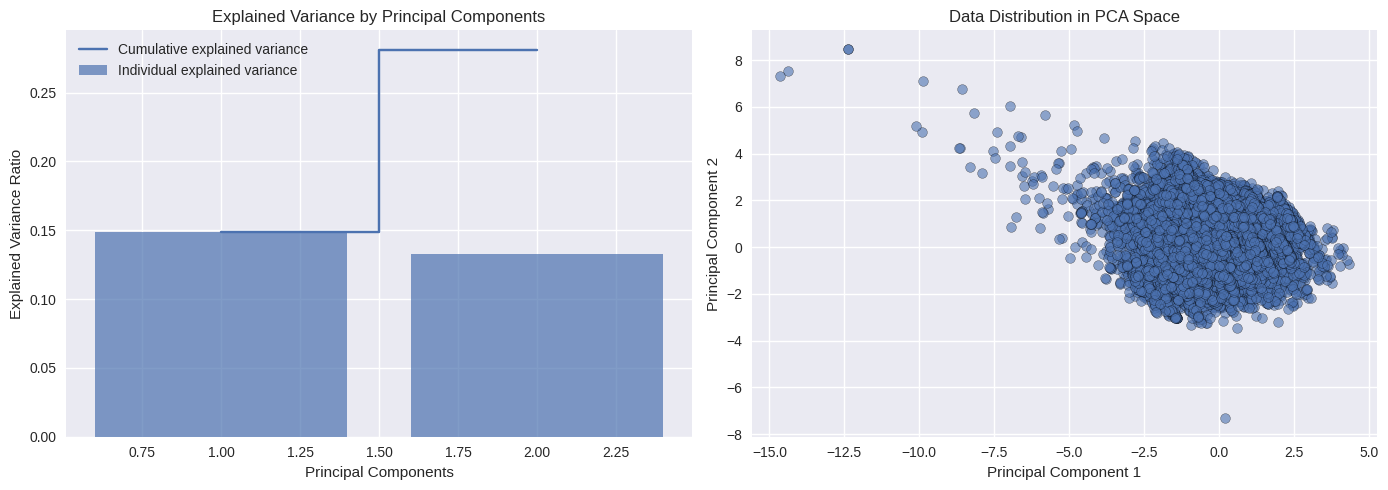

Total variance captured by first 2 components: 28.12%
Shape after PCA: (45211, 2)


In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.

    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Initialize and fit PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Create visualization
    plt.figure(figsize=(14, 5))

    # ---- Explained variance plot ----
    plt.subplot(1, 2, 1)
    explained_var = pca.explained_variance_ratio_
    plt.bar(range(1, len(explained_var) + 1), explained_var, alpha=0.7, label='Individual explained variance')
    plt.step(range(1, len(explained_var) + 1), np.cumsum(explained_var), where='mid', label='Cumulative explained variance')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Principal Components')
    plt.legend()

    # ---- Data distribution in 2D ----
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, edgecolor='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Data Distribution in PCA Space')

    plt.tight_layout()
    plt.show()

    # Print total variance captured
    total_variance = np.sum(explained_var) * 100
    print(f"Total variance captured by first {n_components} components: {total_variance:.2f}%")

    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

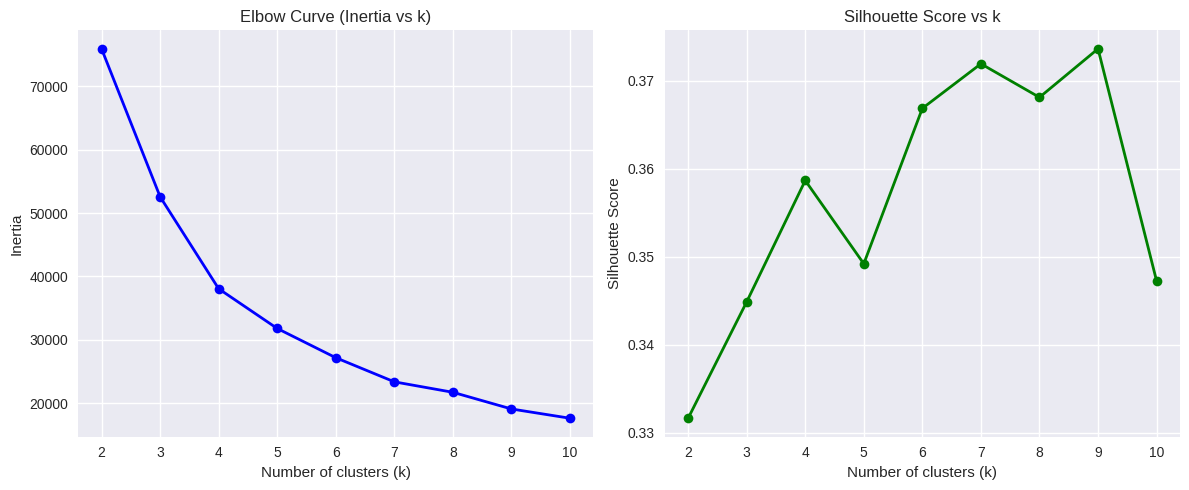

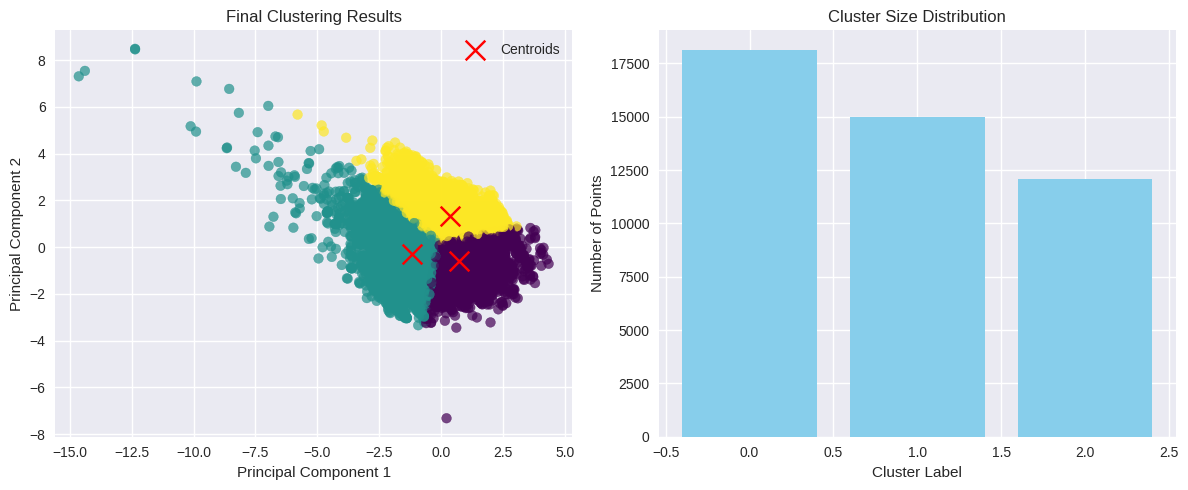


Clustering Evaluation:
Inertia: 52565.33
Silhouette Score: 0.345


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).

    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    inertia = 0
    for i, centroid in enumerate(centroids):
        cluster_points = X[labels == i]
        distances = np.linalg.norm(cluster_points - centroid, axis=1)
        inertia += np.sum(distances ** 2)
    return inertia


def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.

    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    inertias = []
    silhouette_scores = []
    K = range(2, max_k + 1)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)

    # Create elbow and silhouette plots
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(K, inertias, 'bo-', linewidth=2)
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Curve (Inertia vs k)')

    plt.subplot(1, 2, 2)
    plt.plot(K, silhouette_scores, 'go-', linewidth=2)
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs k')

    plt.tight_layout()
    plt.show()

    return inertias


# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)

# Apply final clustering
optimal_k = 3  # Adjust this based on elbow & silhouette plots
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(12, 5))

# ---- Plot clusters ----
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Final Clustering Results')
plt.legend()

# ---- Plot cluster size distribution ----
plt.subplot(1, 2, 2)
unique, counts = np.unique(kmeans.labels_, return_counts=True)
plt.bar(unique, counts, color='skyblue')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.title('Cluster Size Distribution')

plt.tight_layout()
plt.show()

# ---- Calculate and print evaluation metrics ----
inertia = calculate_inertia(X_pca, kmeans.labels_, kmeans.cluster_centers_)
silhouette = silhouette_score(X_pca, kmeans.labels_)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.3f}")

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

In [7]:
from sklearn.cluster import KMeans
import numpy as np

class BisectingKMeans:
    """Recursive Bisecting K-means algorithm implementation."""

    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        self.split_tree = {}   # Optional: store parent -> (left, right)
        self.centers_ = {}     # Optional: store centroids per cluster id

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached."""
        n_samples = X.shape[0]
        labels = np.zeros(n_samples, dtype=int)
        cluster_count = 1  # current number of clusters
        next_label_id = 1  # next new label id to assign

        # Store centroids for the initial cluster (whole dataset)
        self.centers_[0] = np.mean(X, axis=0)

        while cluster_count < self.n_clusters:
            # Find cluster with the most points to split
            unique_labels, counts = np.unique(labels, return_counts=True)
            largest_cluster = unique_labels[np.argmax(counts)]

            # Extract points belonging to the largest cluster
            mask = labels == largest_cluster
            X_sub = X[mask]

            # Perform binary KMeans (k=2) on this cluster
            kmeans = KMeans(n_clusters=2, random_state=self.random_state)
            sub_labels = kmeans.fit_predict(X_sub)

            # Assign new labels
            left_label = largest_cluster          # Keep one as old label
            right_label = next_label_id           # Create new label
            next_label_id += 1

            # Update labels in main array
            labels[mask] = np.where(sub_labels == 0, left_label, right_label)

            # Record split info and centroids
            self.split_tree[largest_cluster] = (left_label, right_label)
            self.centers_[left_label] = kmeans.cluster_centers_[0]
            self.centers_[right_label] = kmeans.cluster_centers_[1]

            cluster_count = len(np.unique(labels))

        self.labels_ = labels
        return labels

## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!